# Exploratory Data Analysis for Movies on Streaming Platforms



# Table of content:
>1. [Introduction](#Introduction)
>2.[Read Data](#Read_Data)
>3.[Data Cleaning and Aggregation](#Data_Cleaning_and_Aggregation)
>4.[Exploratory Data Analysis And visualization](#Exploratory_Data_Analysis_and_visualization)







# [Introduction](#Introduction)



Movies streaming services becoming increasingly popular, in this EDA project, We are searching for the most impressive movie library of any on-demand streaming service, with a wider range of new and classic content.
The objective is to make a comparison and, suggest striges lead to improvement.  After asking the right questions we ready to get started. This bring us the next step which is data collection our data is collected from Kaggle website. After that,  Cleaning data this is a vital step because ultimately, the accuracy of your analysis will depend on the quality of your data.
Finally, Visualizing data & interrupting result.Movies streaming services becoming increasingly popular, in this EDA project, We are searching for the most impressive movie library of any on-demand streaming service, with a wider range of new and classic content.
The objective is to make a comparison and, suggest striges lead to improvement.  After asking the right questions we ready to get started. This bring us the next step which is data collection our data is collected from Kaggle website. After that,  Cleaning data this is a vital step because ultimately, the accuracy of your analysis will depend on the quality of your data.
Finally, Visualizing data & interrupting result.

# [Imports Libraries](#Imports_Libraries)

In [1]:
print ("Importing....." ,end="", flush=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
print ("[Done]")

Importing.....Requirement already satisfied: wordcloud in /opt/anaconda3/lib/python3.8/site-packages (1.8.1)
[Done]


# [Read Data](#Read_Data)

In [2]:
mp= pd.read_csv('/Users/zeinah/Documents/SDAIA/Project1/MoviesOnStreamingPlatforms_updated.csv', index_col=0 )
#To show the top 10 rows in dataset
mp.head(10)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0
5,6,To All the Boys I've Loved Before,2018,13+,7.1/10,94/100,1,0,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0
6,7,The Social Dilemma,2020,13+,7.6/10,93/100,1,0,0,0,0,Jeff Orlowski,"Documentary,Drama",United States,English,94.0
7,8,Okja,2017,13+,7.3/10,92/100,1,0,0,0,0,Bong Joon Ho,"Action,Adventure,Drama,Sci-Fi","South Korea,United States","English,Korean,Spanish",120.0
8,9,The Ballad of Buster Scruggs,2018,16+,7.3/10,92/100,1,0,0,0,0,"Ethan Coen,Joel Coen","Comedy,Drama,Musical,Mystery,Romance,Western",United States,"English,French",133.0
9,10,The Trial of the Chicago 7,2020,18+,7.8/10,92/100,1,0,0,0,0,Aaron Sorkin,"Drama,History,Thriller","United States,United Kingdom,India","English,Latin,French",129.0


In [3]:
#To show some information about dataset such as: Column name, datatype, No.of Rows.
mp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9515 entries, 0 to 9514
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9515 non-null   int64  
 1   Title            9515 non-null   object 
 2   Year             9515 non-null   int64  
 3   Age              5338 non-null   object 
 4   IMDb             9309 non-null   object 
 5   Rotten Tomatoes  9508 non-null   object 
 6   Netflix          9515 non-null   int64  
 7   Hulu             9515 non-null   int64  
 8   Prime Video      9515 non-null   int64  
 9   Disney+          9515 non-null   int64  
 10  Type             9515 non-null   int64  
 11  Directors        9104 non-null   object 
 12  Genres           9399 non-null   object 
 13  Country          9261 non-null   object 
 14  Language         9202 non-null   object 
 15  Runtime          9196 non-null   float64
dtypes: float64(1), int64(7), object(8)
memory usage: 1.2+ MB


# [Data Cleaning and Aggregation](#Data_Cleaning_and_Aggregation) 

##### The Age column It’s includes character, float, and string. First, we removed the character. After that, we replaced the string and null with 0. Finally, converted from object to float to replace all 0 and null with the mode, it’s was the best solution in our case so won’t lose accuracy of data. 

In [4]:
# drop columns that not helpful for my analysis
mp.drop('Language',
  axis='columns', inplace=True)

In [5]:
mp.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9510    False
9511    False
9512    False
9513    False
9514    False
Length: 9515, dtype: bool

In [6]:
#drop null values 
# removed the character
mp['Age']=mp['Age'].str.replace('+' , '' )

In [7]:
#replaced the string and null with 0
mp['Age'] = mp['Age'].replace(np.nan, 0)

In [8]:
 mp.replace('all', None , inplace = True)

ID                 None
Title              None
Year               None
Age                None
IMDb               None
Rotten Tomatoes    None
Netflix            None
Hulu               None
Prime Video        None
Disney+            None
Type               None
Directors          None
Genres             None
Country            None
Runtime            None
dtype: object

In [9]:
mp['Age']=mp['Age'].replace(0, np.nan)

In [10]:
mp.Age.value_counts()

18    2362
7     1366
13    1055
16     289
Name: Age, dtype: int64

In [11]:
#converted  Age column from object to float to replace all 0 and null with the mode
mp['Age']= mp.Age.astype('float')

In [12]:
mp["Age"].mode()

0    18.0
dtype: float64

In [13]:
#replace all 0 and null with the mode
cateogry_columns=mp.select_dtypes(include=['float']).columns.tolist()
for Age in mp:
    if mp[Age].isnull().any():
        if(Age in cateogry_columns):
            mp[Age]=mp[Age].fillna(mp[Age].mode()[0])

In [14]:
mp['Age']= mp.Age.astype('int')

In [15]:
mp

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Runtime
0,1,The Irishman,2019,18,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,209.0
1,2,Dangal,2016,7,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom",224.0
4,5,Roma,2018,18,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,9511,Most Wanted Sharks,2020,18,NaN,14/100,0,0,0,1,0,NaN,"Crime,Reality-TV",United States,90.0
9511,9512,Doc McStuffins: The Doc Is In,2020,18,NaN,13/100,0,0,0,1,0,Chris Anthony Hamilton,Animation,United States,23.0
9512,9513,Ultimate Viking Sword,2019,18,NaN,13/100,0,0,0,1,0,NaN,NaN,United States,90.0
9513,9514,Hunt for the Abominable Snowman,2011,18,NaN,10/100,0,0,0,1,0,Dan Oliver,"Drama,History",NaN,90.0


In [16]:
mp.Age.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
9510    False
9511    False
9512    False
9513    False
9514    False
Name: Age, Length: 9515, dtype: bool

In [17]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9515 entries, 0 to 9514
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9515 non-null   int64  
 1   Title            9515 non-null   object 
 2   Year             9515 non-null   int64  
 3   Age              9515 non-null   int64  
 4   IMDb             9309 non-null   object 
 5   Rotten Tomatoes  9508 non-null   object 
 6   Netflix          9515 non-null   int64  
 7   Hulu             9515 non-null   int64  
 8   Prime Video      9515 non-null   int64  
 9   Disney+          9515 non-null   int64  
 10  Type             9515 non-null   int64  
 11  Directors        9104 non-null   object 
 12  Genres           9399 non-null   object 
 13  Country          9261 non-null   object 
 14  Runtime          9515 non-null   float64
dtypes: float64(1), int64(8), object(6)
memory usage: 1.2+ MB


In [18]:
mp.Age.unique()

array([18,  7, 13, 16])

In [19]:
#Check for missing data
mp.isna().sum()

ID                   0
Title                0
Year                 0
Age                  0
IMDb               206
Rotten Tomatoes      7
Netflix              0
Hulu                 0
Prime Video          0
Disney+              0
Type                 0
Directors          411
Genres             116
Country            254
Runtime              0
dtype: int64

In [20]:
mp.describe()

,ID,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.0,9515.000000
mean,4758.000000,2007.422386,15.805675,0.388334,0.110037,0.432265,0.096900,0.0,95.025118
std,2746.888239,19.130367,3.930788,0.487397,0.312952,0.495417,0.295837,0.0,29.167687
min,1.000000,1914.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,2379.500000,2006.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.0,85.000000
50%,4758.000000,2015.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.0,94.000000
75%,7136.500000,2018.000000,18.000000,1.000000,0.000000,1.000000,0.000000,0.0,108.000000
max,9515.000000,2021.000000,18.000000,1.000000,1.000000,1.000000,1.000000,0.0,566.000000


In [21]:
mp.Age

0       18
1        7
2        7
3        7
4       18
        ..
9510    18
9511    18
9512    18
9513    18
9514     7
Name: Age, Length: 9515, dtype: int64

In [22]:

mp.dropna(how='any',inplace=True)

In [23]:
mp.isna ().sum()

ID                 0
Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
Directors          0
Genres             0
Country            0
Runtime            0
dtype: int64

# [Exploratory Data Analysis And visualization](#Exploratory_Data_Analysis_And_visualization)



In [24]:
mp.Genres.unique()

array(['Biography,Crime,Drama', 'Action,Biography,Drama,Sport',
       'Documentary,Biography', ..., 'Family,Music,Musical',
       'Adventure,Drama,Family,Romance,Western', 'Family,Drama,Western'],
      dtype=object)

##### From Genres column we have to extract categories. 
Firstly we will split each listing, 
Then we count each category, 
Lastly We will Sort and save it as dictionary.

In [25]:
mp['Genres']=mp['Genres'].str.replace('-' , ' ' )

In [26]:
#split each listing
Genres= []
for i in range(len(mp)):
    Genres.extend(mp.Genres.iloc[i].split(','))
print (Genres)

['Biography', 'Crime', 'Drama', 'Action', 'Biography', 'Drama', 'Sport', 'Documentary', 'Biography', 'Drama', 'Musical', 'Sport', 'Comedy', 'Drama', 'Romance', 'Documentary', 'Drama', 'Action', 'Adventure', 'Drama', 'Sci Fi', 'Comedy', 'Drama', 'Musical', 'Mystery', 'Romance', 'Western', 'Drama', 'History', 'Thriller', 'Crime', 'Drama', 'Mystery', 'Thriller', 'Documentary', 'Biography', 'Comedy', 'Drama', 'Drama', 'War', 'Drama', 'Documentary', 'Crime', 'Music', 'Documentary', 'Biography', 'Music', 'Documentary', 'War', 'Action', 'Crime', 'Drama', 'History', 'Crime', 'Drama', 'Mystery', 'Thriller', 'Biography', 'Drama', 'History', 'Romance', 'War', 'Comedy', 'Drama', 'Mystery', 'Sci Fi', 'Thriller', 'Crime', 'Drama', 'Thriller', 'Documentary', 'Action', 'Sci Fi', 'Animation', 'Drama', 'Fantasy', 'Romance', 'Drama', 'Western', 'Comedy', 'Drama', 'Romance', 'Biography', 'Drama', 'History', 'Crime', 'Drama', 'Thriller', 'Comedy', 'Drama', 'Drama', 'Drama', 'Horror', 'Thriller', 'Drama', '

In [27]:
#count each category.
dic_genres= {}
for i in Genres:
    dic_genres[i] = Genres.count(i)
print(dic_genres)

{'Biography': 468, 'Crime': 1072, 'Drama': 4057, 'Action': 1542, 'Sport': 302, 'Documentary': 1030, 'Musical': 287, 'Comedy': 3277, 'Romance': 1600, 'Adventure': 1164, 'Sci Fi': 659, 'Mystery': 675, 'Western': 221, 'History': 322, 'Thriller': 1831, 'War': 249, 'Music': 357, 'Animation': 677, 'Fantasy': 812, 'Horror': 810, 'Family': 1303, 'Short': 278, 'Reality TV': 4, 'Talk Show': 1, 'News': 13, 'Film Noir': 24}


In [28]:
#Sort and save it as dictionary.
dic_genres = sorted(dic_genres.items(), key=lambda item: item[1], reverse=True)
print(dic_genres)

[('Drama', 4057), ('Comedy', 3277), ('Thriller', 1831), ('Romance', 1600), ('Action', 1542), ('Family', 1303), ('Adventure', 1164), ('Crime', 1072), ('Documentary', 1030), ('Fantasy', 812), ('Horror', 810), ('Animation', 677), ('Mystery', 675), ('Sci Fi', 659), ('Biography', 468), ('Music', 357), ('History', 322), ('Sport', 302), ('Musical', 287), ('Short', 278), ('War', 249), ('Western', 221), ('Film Noir', 24), ('News', 13), ('Reality TV', 4), ('Talk Show', 1)]


In [29]:
gen = pd.DataFrame(dic_genres, columns=["genre", "count"])

In [30]:
gen

,genre,count
0,Drama,4057
1,Comedy,3277
2,Thriller,1831
3,Romance,1600
4,Action,1542
5,Family,1303
6,Adventure,1164
7,Crime,1072
8,Documentary,1030
9,Fantasy,812


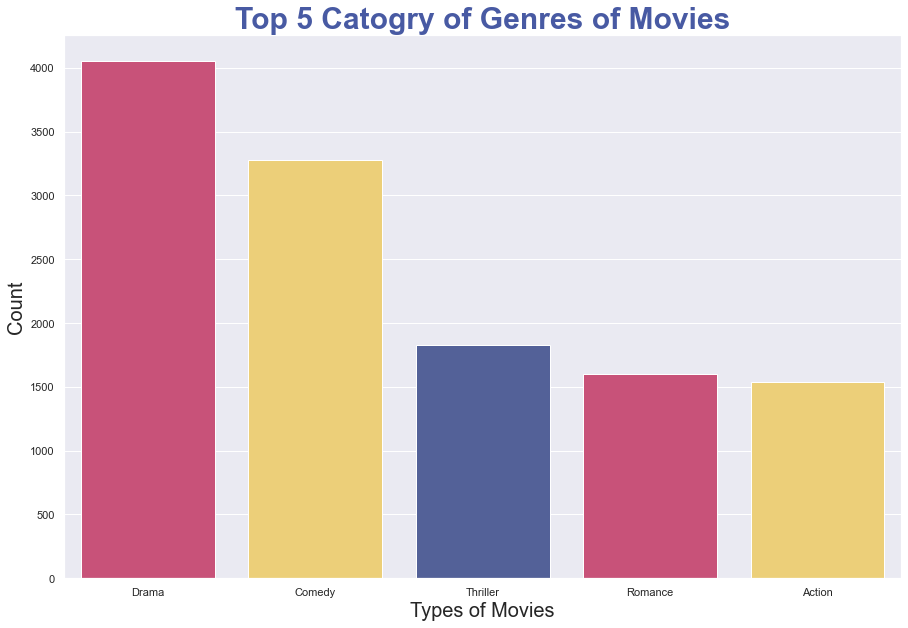

In [31]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data=gen.head(5), x="genre", y="count", palette=['#db3f72', '#ffd966', '#485aa3']);
plt.title('Top 5 Catogry of Genres of Movies',fontsize=30, fontweight='bold', color='#485aa3') 
plt.xlabel('Types of Movies',fontsize=20)
plt.ylabel('Count',fontsize=20);
plt.savefig('Types_of_Movies.png',transparent=True) # To save the plot,


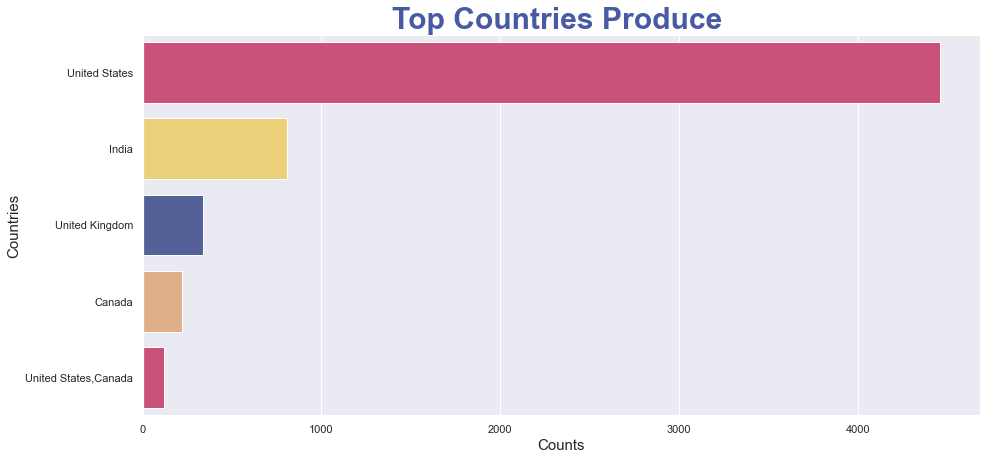

In [32]:
plt.figure(figsize=(15,7))
chains=mp['Country'].value_counts()[:5] #Top 5 
sns.barplot(x=chains,y=chains.index, palette=['#db3f72', '#ffd966', '#485aa3','#edad7b'])
plt.title("Top Countries Produce ",size=30, fontweight='bold', color='#485aa3')
plt.xlabel("Counts",size=15) 
plt.ylabel("Countries",size=15) 
plt.savefig('Top_Countries_Produce.png',transparent=True)

In [33]:
mp["Age"].value_counts()

18    6296
7     1303
13    1014
16     278
Name: Age, dtype: int64

In [34]:
#we defied the Age into three categories Adult, Teenager and kids.
def Catogery (mp):
    if mp >= 18: 
        return'Adult'
    elif mp >= 13 : 
        return " Teenager"
    elif mp >= 5:
        return "Child"
    else:
        return "Baby"
#combine All the Age in One Column 
mp['Age_Catagery'] = mp.Age.apply(Catogery)

In [35]:
mp

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Runtime,Age_Catagery
0,1,The Irishman,2019,18,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,209.0,Adult
1,2,Dangal,2016,7,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...",161.0,Child
2,3,David Attenborough: A Life on Our Planet,2020,7,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,83.0,Child
3,4,Lagaan: Once Upon a Time in India,2001,7,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom",224.0,Child
5,6,To All the Boys I've Loved Before,2018,13,7.1/10,94/100,1,0,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,99.0,Teenager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,9493,Man Among Cheetahs,2017,18,7.0/10,35/100,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,44.0,Adult
9494,9495,Sultan And The Rock Star,1980,7,5.6/10,34/100,0,0,0,1,0,Edward M. Abroms,"Adventure,Drama,Family",United States,60.0,Child
9495,9496,My Music Story: Yoshiki,2021,16,7.3/10,33/100,0,0,0,1,0,"Aiji Okazaki,Kentaro Takayanagi","Documentary,Music","United States,Japan",47.0,Teenager
9496,9497,Disney Channel Halloween House Party,2020,18,5.3/10,33/100,0,0,0,1,0,Trevor Moore,"Comedy,Family,Musical",United States,22.0,Adult


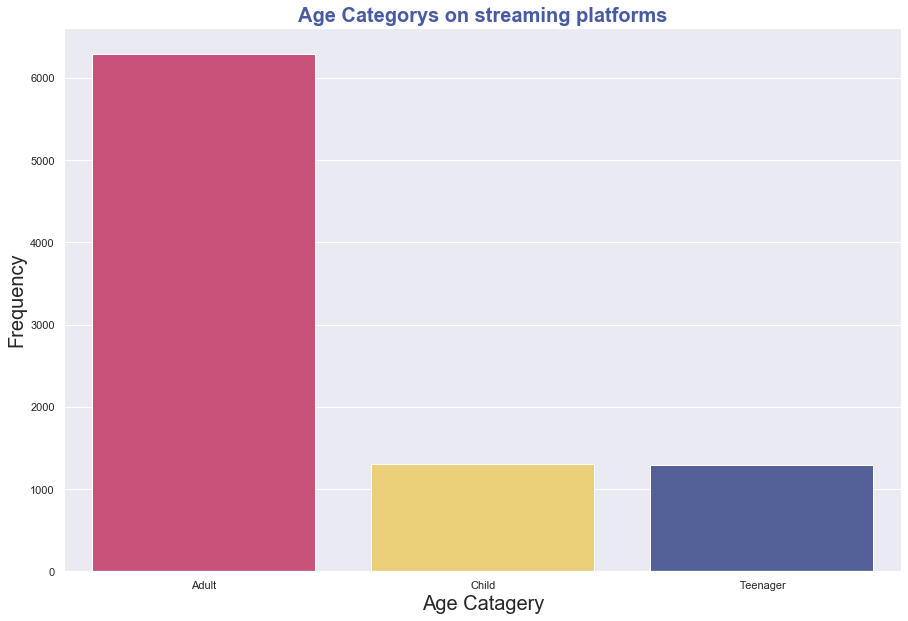

In [36]:
sns.countplot(data=mp,x= "Age_Catagery" , palette=['#db3f72', '#ffd966', '#485aa3','#edad7b'])
plt.title('Age Categorys on streaming platforms', fontsize=20, fontweight='bold',color='#485aa3') 
plt.xlabel('Age Catagery',size=20)
plt.ylabel('Frequency',size=20)
plt.savefig('Age_Catagry.png',transparent=True );


In [37]:
mp = mp.rename(columns={"Prime Video":"PrimeVideo", "Disney+":"disney"})

In [38]:
# Combine All the platform streaming in One Column  
mp["platform"] = np.where(mp.Netflix ==1, "netflix",
         np.where(mp.Hulu ==1,"hulu",
                  np.where(mp.PrimeVideo == 1,"primeVideo",
                           np.where(mp.disney ==1,"disney"
                                    ,"other"))))

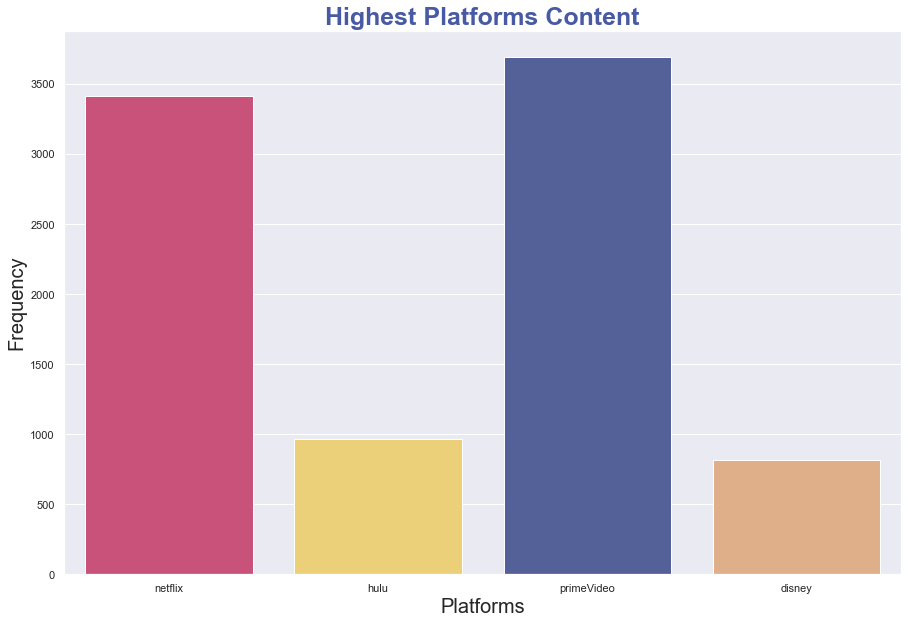

In [39]:
sns.countplot(data=mp,x="platform" , palette=['#db3f72', '#ffd966', '#485aa3','#edad7b'])
plt.title('Highest Platforms Content', fontsize=25, fontweight='bold',color='#485aa3')

plt.xlabel('Platforms',size=20)
plt.ylabel('Frequency',size=20)
plt.savefig('Highest Platforms Content.png',transparent=True)


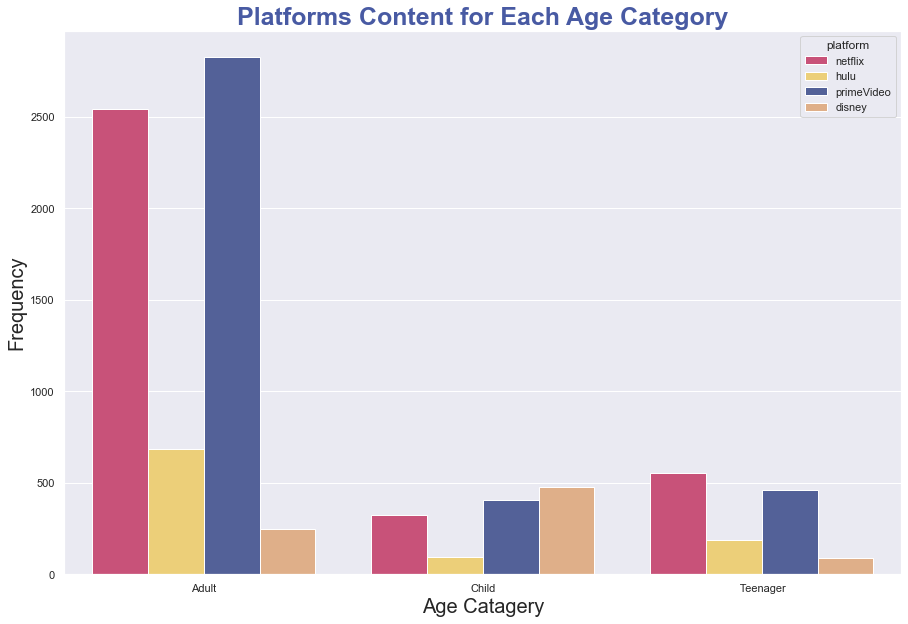

In [40]:
sns.countplot(data=mp, x="Age_Catagery", hue="platform" , palette=['#db3f72', '#ffd966', '#485aa3','#edad7b']);
plt.title('Platforms Content for Each Age Category', fontsize=25, fontweight='bold', color='#485aa3')
plt.xlabel('Age Catagery',size=20)
plt.ylabel('Frequency',size=20)
plt.savefig('Platforms Content for Each Age  .png',transparent=True)

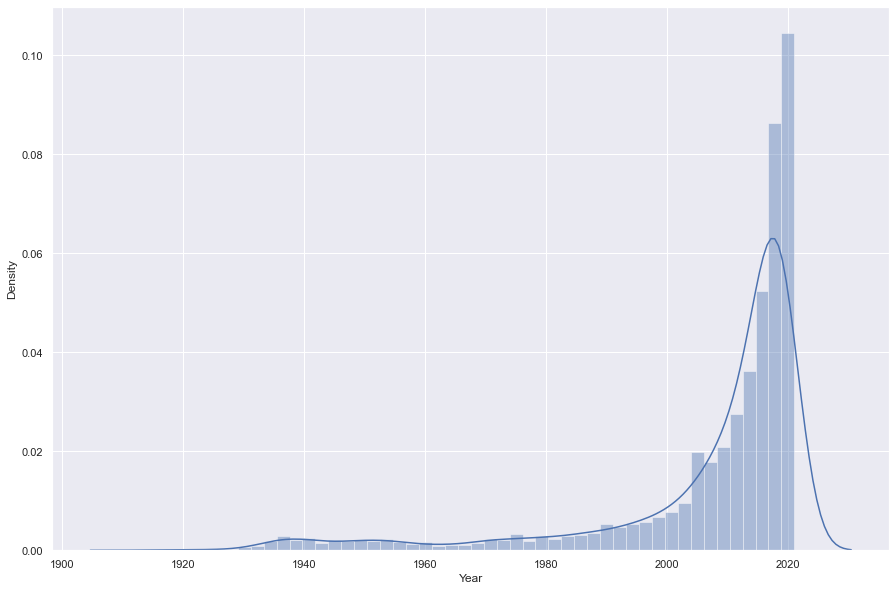

In [41]:
sns.distplot(mp['Year']);

In [42]:
def run_time(mp):
    if  mp <= 60 :
        return 'Short'
    elif  mp <= 120: 
        return'normal'
    else :
        return'long'

In [43]:
mp['Runtime']= mp.Runtime.astype('int')

In [44]:
mp['Runtime']

0       209
1       161
2        83
3       224
5        99
       ... 
9492     44
9494     60
9495     47
9496     22
9497     90
Name: Runtime, Length: 8891, dtype: int64

In [45]:
mp["Runtime_bin"] = mp.Runtime.apply(run_time)

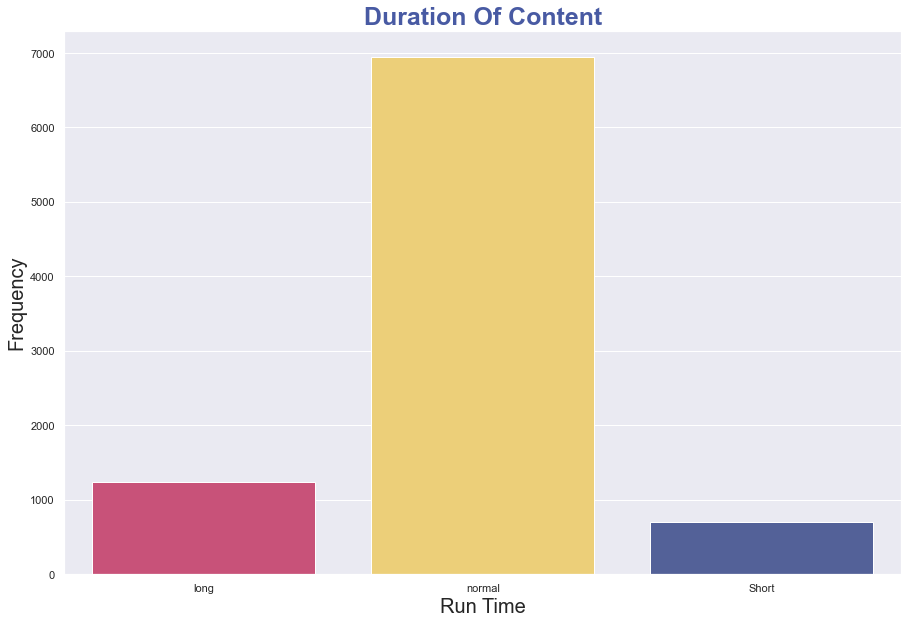

In [46]:
sns.countplot(data=mp,x="Runtime_bin" , palette=['#db3f72', '#ffd966', '#485aa3','#edad7b']) 
plt.title('Duration Of Content', fontsize=25, fontweight='bold',color='#485aa3');
plt.xlabel('Run Time',size=20)
plt.ylabel('Frequency',size=20)
plt.savefig('Movies Run Time.png',transparent=True);

    
    

In [47]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8891 entries, 0 to 9497
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               8891 non-null   int64 
 1   Title            8891 non-null   object
 2   Year             8891 non-null   int64 
 3   Age              8891 non-null   int64 
 4   IMDb             8891 non-null   object
 5   Rotten Tomatoes  8891 non-null   object
 6   Netflix          8891 non-null   int64 
 7   Hulu             8891 non-null   int64 
 8   PrimeVideo       8891 non-null   int64 
 9   disney           8891 non-null   int64 
 10  Type             8891 non-null   int64 
 11  Directors        8891 non-null   object
 12  Genres           8891 non-null   object
 13  Country          8891 non-null   object
 14  Runtime          8891 non-null   int64 
 15  Age_Catagery     8891 non-null   object
 16  platform         8891 non-null   object
 17  Runtime_bin      8891 non-null   

In [48]:
mp['IMDb']=mp['IMDb'].str.replace('/10' , '' )

In [49]:
mp['IMDb'].unique()

array(['7.8', '8.4', '9.0', '8.1', '7.1', '7.6', '7.3', '8.2', '7.7',
       '7.4', '7.2', '8.5', '8.0', '6.7', '6.9', '6.5', '6.8', '8.3',
       '7.9', '7.0', '6.6', '7.5', '6.2', '6.4', '6.3', '5.9', '8.8',
       '5.6', '6.0', '5.8', '6.1', '5.2', '5.5', '5.3', '5.7', '5.4',
       '5.0', '4.9', '4.7', '5.1', '4.4', '8.6', '4.8', '4.6', '4.0',
       '4.5', '3.3', '3.5', '8.7', '4.1', '3.8', '4.2', '4.3', '3.2',
       '3.9', '2.5', '2.9', '3.7', '8.9', '3.4', '3.6', '3.0', '3.1',
       '2.8', '2.6', '2.1', '2.4', '2.0', '2.2', '2.7', '1.5', '1.8',
       '1.7', '9.2', '9.8', '9.7', '1.9', '2.3', '1.1', '1.6'],
      dtype=object)

In [50]:
mp['IMDb']= mp.IMDb.astype('float')

In [51]:
mp['IMDb']= mp.IMDb.astype('int')

In [52]:
def rating(mp):
    if  mp >= 8:
        return 'High Rated'
    elif  mp <= 7 and mp > 5 : #if the rating less than or equal 7 and greater than 5 replaced with med rated
        return'Med Rated'
    else:
        return'Low Rated'

mp['Movie_rating'] = mp.IMDb.apply(rating)

In [53]:
mp['Movie_rating']= mp.Movie_rating.astype('object')

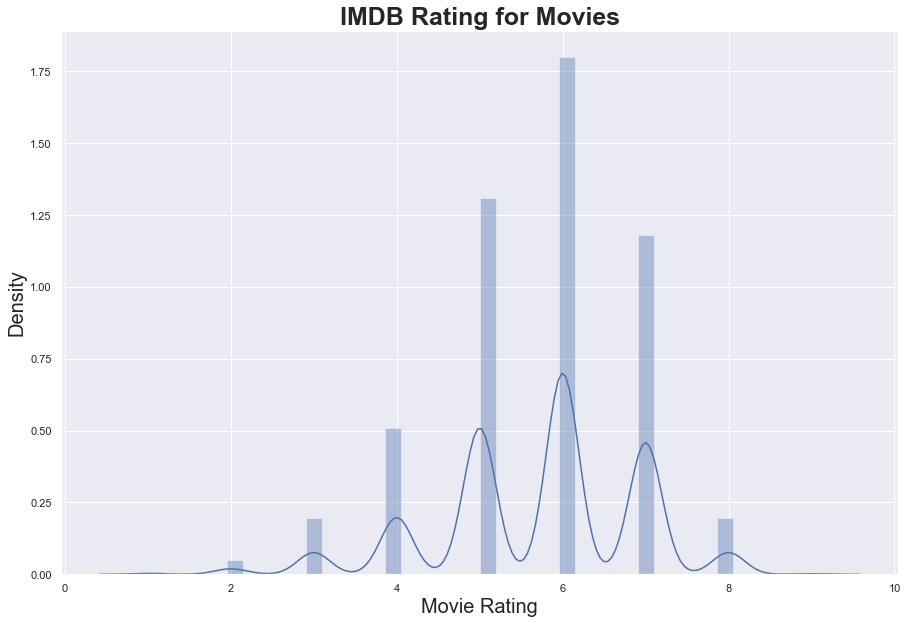

In [54]:
sns.distplot(mp['IMDb']) ;
plt.title('IMDB Rating for Movies', fontsize=25, fontweight='bold');
plt.xlabel('Movie Rating', size= 20 )
plt.ylabel('Density', size = 20)
plt.savefig('IMDB Rating.png', transparent=True);

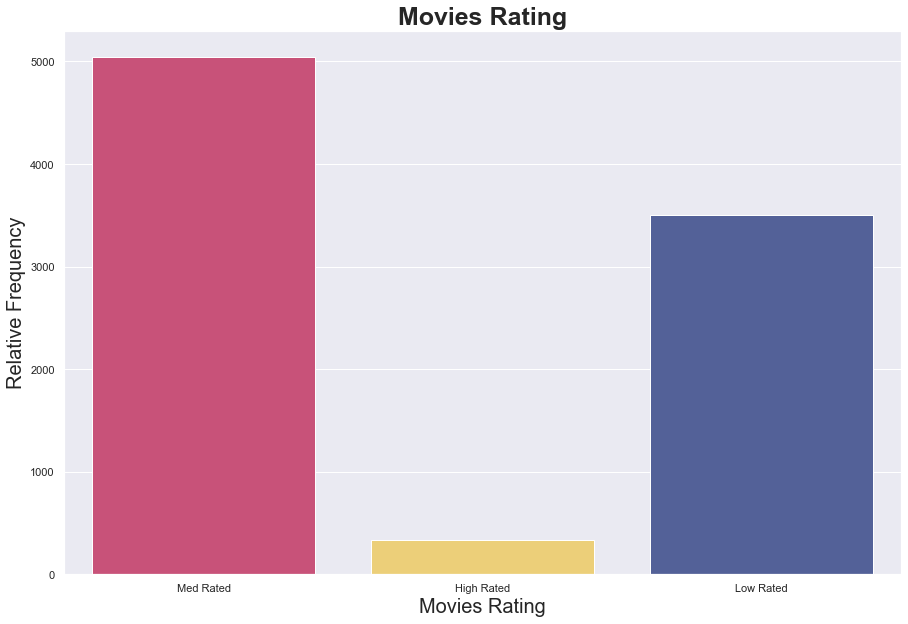

In [55]:
sns.countplot(data=mp,x='Movie_rating', palette=['#db3f72', '#ffd966', '#485aa3','#edad7b'])    
plt.title('Movies Rating', fontsize=25, fontweight='bold');
plt.xlabel('Movies Rating' , size=20)
plt.ylabel('Relative Frequency', size=20)
plt.savefig('Movie_rating.png' , transparent=True)

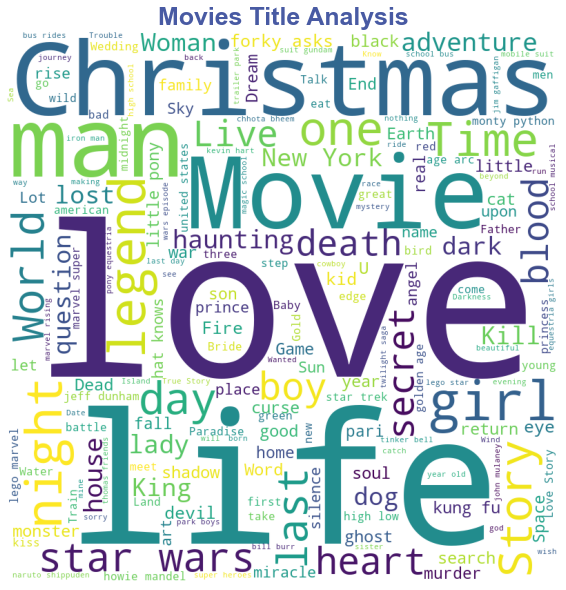

In [56]:
#From word cloud we can see that Most of the titles of netflix are about love,christams,world.
         
comment_words = ''

stopwords = set(STOPWORDS)


for val in mp.Title:
  
  val = str(val)
  
  tokens = val.split()
  
  for i in range(len(tokens)):
    
    
    tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens) + " "
   
wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                    stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)#سو عملية جينيريت ولدها لي 
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')

plt.title('Movies Title Analysis', fontsize=25, fontweight='bold' , color='#485aa3')
plt.tight_layout(pad = 0)
plt.show()